In [3]:
import keras
from keras.datasets import mnist
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

# flatten & reduce image dimensions
X_train = X_train[:6000].reshape(-1, 784)
y_train = y_train[:6000]
X_test = X_test[:1000].reshape(-1, 784)
y_test = y_test[:1000]
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
(6000, 784) (6000,) (1000, 784) (1000,)


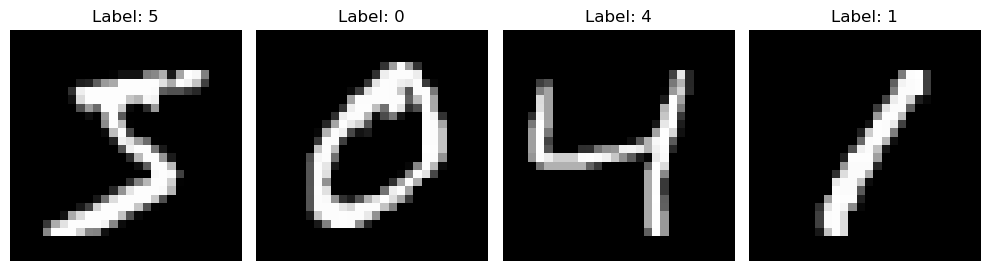

In [7]:
# Print 4 images in a row
plt.figure(figsize=(10, 5))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [20]:
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def calculate_distances(A, B):
    m, n = A.shape[0], B.shape[0]
    D = np.zeros((m, n))
    for i in range(m):
        D[i, :] = np.sqrt(np.sum((A[i] - B) ** 2, axis=1))
    return D

def calculate_neighbors(D, k, nb_labels):
    N = np.argsort(D, axis=1)[:, :k]
    for i in range(N.shape[0]):
        N[i, :] = nb_labels[N[i, :]]
    return N

def predict_classes(N):
    m, _ = N.shape
    y_hat = np.zeros((m))
    for i in range(m):
        counts = np.asarray(np.unique(N[i, :], return_counts=True)).T
        y_hat[i] = counts[np.argmax(counts[:, 1])][0]
    return y_hat

def calculate_error(y_hat, y_true):
    accuracy = (y_hat == y_true).sum() / len(y_hat)
    error = 1.0 - accuracy
    return error

def knn(k):
    # train error
    D = calculate_distances(X_train, X_train)
    N = calculate_neighbors(D, k, y_train)
    y_hat = predict_classes(N)
    err_train = calculate_error(y_hat, y_train)
    
    # test error
    D = calculate_distances(X_test, X_train)
    N = calculate_neighbors(D, k, y_train)
    y_hat = predict_classes(N)
    err_test = calculate_error(y_hat, y_test)

    # return both errors
    return err_train, err_test

In [21]:
"""
Execute KNN using various k-values, 5 runs for each.
"""
results = []
k_values = [1, 9, 19, 29, 39, 49, 59, 69, 79, 89, 99]
for k in k_values:
    for i in range(5):
        err_train, err_test = knn(k)
        results.append({
            'k': k,
            'i': i,
            'err_train': err_train,
            'err_test': err_test,
        })
        print(f"k={k}, i={i}, err_train={err_train}, err_test={err_test}")

k=1, i=0, err_train=0.0, err_test=0.74
k=1, i=1, err_train=0.0, err_test=0.74
k=1, i=2, err_train=0.0, err_test=0.74
k=1, i=3, err_train=0.0, err_test=0.74
k=1, i=4, err_train=0.0, err_test=0.74
k=9, i=0, err_train=0.7338333333333333, err_test=0.8049999999999999
k=9, i=1, err_train=0.7338333333333333, err_test=0.8049999999999999
k=9, i=2, err_train=0.7338333333333333, err_test=0.8049999999999999
k=9, i=3, err_train=0.7338333333333333, err_test=0.8049999999999999
k=9, i=4, err_train=0.7338333333333333, err_test=0.8049999999999999
k=19, i=0, err_train=0.7823333333333333, err_test=0.8200000000000001
k=19, i=1, err_train=0.7823333333333333, err_test=0.8200000000000001
k=19, i=2, err_train=0.7823333333333333, err_test=0.8200000000000001
k=19, i=3, err_train=0.7823333333333333, err_test=0.8200000000000001
k=19, i=4, err_train=0.7823333333333333, err_test=0.8200000000000001
k=29, i=0, err_train=0.8069999999999999, err_test=0.8260000000000001
k=29, i=1, err_train=0.8069999999999999, err_test=0

    err_train  err_test
k                      
1    0.000000     0.740
9    0.733833     0.805
19   0.782333     0.820
29   0.807000     0.826
39   0.815833     0.826
49   0.826000     0.834
59   0.833667     0.838
69   0.840333     0.845
79   0.842000     0.844
89   0.843500     0.848
99   0.847833     0.848


<Axes: title={'center': 'K-Neighbors vs Error Rates'}, xlabel='K', ylabel='Error Rate'>

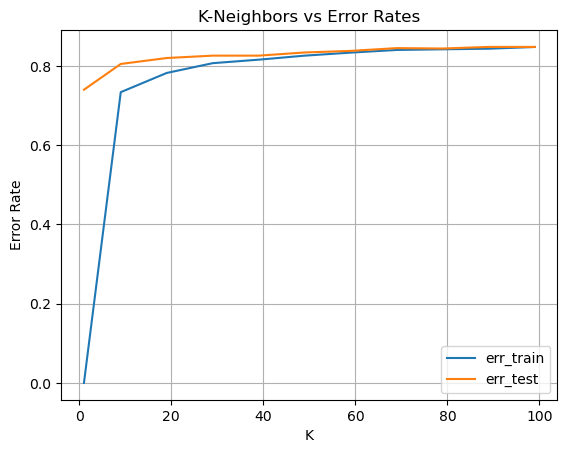

In [27]:
"""
Analyze experiment results.
"""
results_df = pd.DataFrame.from_records(results).set_index('k')
results_df = results_df.groupby(by=['k'])[['err_train', 'err_test']].agg('mean')
print(results_df)
results_df.plot(
    xlabel="K",
    ylabel="Error Rate",
    title="K-Neighbors vs Error Rates",
    grid=True,
)